# scatterplots
with Formula 1 data from https://ergast.com/mrd/db

In [1]:
%autosave 0
%load_ext autoreload
%autoreload 2

from tools import DATADIR, F1_ZIPPED
from etl.ergast import ErgastF1
from viz.plot import Plot

f1 = ErgastF1(F1_ZIPPED)
plot = Plot('dark_background')
folder = DATADIR / 'plots'

Autosave disabled


In [2]:
fastlaps = (
    f1.results.dropna(subset=['fastlap_kph'])
    .rename(columns={'fastlap_kph': 'kph'})
    .join(f1.races['season id_circuit'.split()], on='id_race')
    .join(f1.circuits['circuit'], on='id_circuit')
    .join(f1.teams['team'], on='id_team')
    ['season circuit team fastlap kph'.split()]
    .sort_values('season circuit kph'.split())
    .reset_index(drop=True)
)
fastlaps

,season,circuit,team,fastlap,kph
0,2004,Albert Park Grand Prix Circuit,Minardi,8,210.666
1,2004,Albert Park Grand Prix Circuit,Minardi,10,211.741
2,2004,Albert Park Grand Prix Circuit,Jordan,15,215.659
3,2004,Albert Park Grand Prix Circuit,McLaren,7,217.098
4,2004,Albert Park Grand Prix Circuit,Jaguar,6,217.336
...,...,...,...,...,...
6217,2019,Yas Marina Circuit,Red Bull,55,197.731
6218,2019,Yas Marina Circuit,Ferrari,44,199.064
6219,2019,Yas Marina Circuit,Ferrari,55,199.688
6220,2019,Yas Marina Circuit,Mercedes,31,200.515


## geschwindigkeitheim

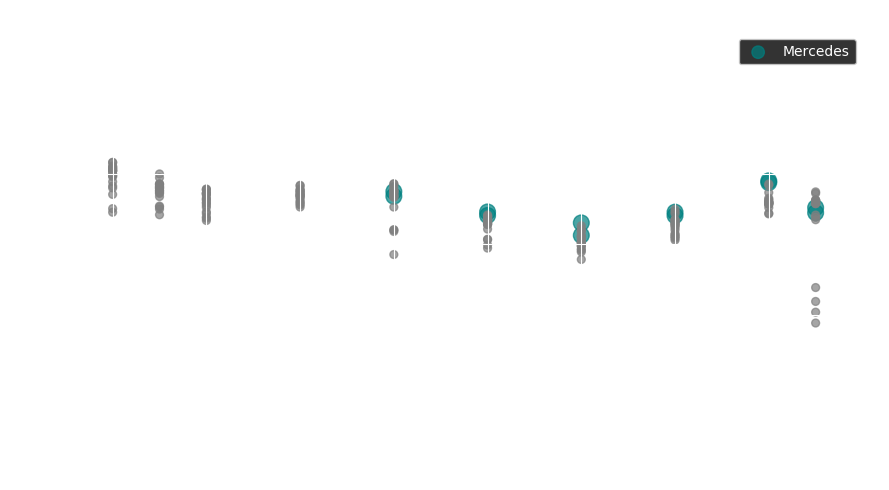

In [3]:
def teamdots(circuit, color, *teams, **kwargs):
    kwset = kwargs.setdefault
    kwset('colorbar', False)
    kwset('title', f"{circuit} fastest lap for each driver") 
    kwset('ylabel', 'kph')
    kwset('xlim', (2003, 2020))
    kwset('ylim', (140, 260))
    
    data = fastlaps.loc[lambda df: df['circuit'].eq(circuit)]
    data = data['season kph team'.split()]
    data['color'] = 'grey'
    data['size'] = 32
    is_team = data['team'].isin(teams)
    data.loc[is_team, 'color'] = color
    data.loc[is_team, 'size'] += 96
    data = data.sort_values('size', ascending=False)
    data.pop('team')
    
    axes = plot.scatter(data, **kwargs)
    axes.legend([' | '.join(teams)])
    
    return axes

axes = teamdots('Hockenheimring', 'teal', 'Mercedes')
axes.figure.savefig(folder / 'geschwindigkeitheim.png')

## velocità d'Italia

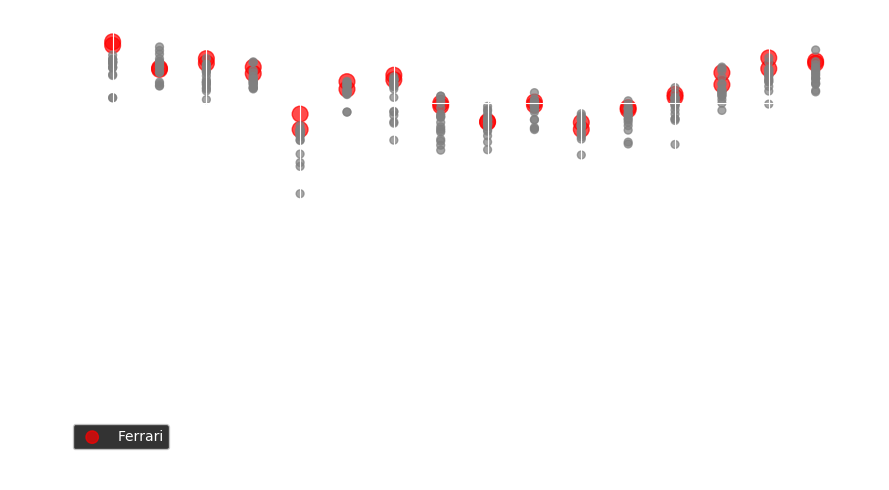

In [4]:
axes = teamdots('Autodromo Nazionale di Monza', 'red', 'Ferrari')
axes.figure.savefig(folder / 'velocita_ditalia.png')

## lauf der stiere

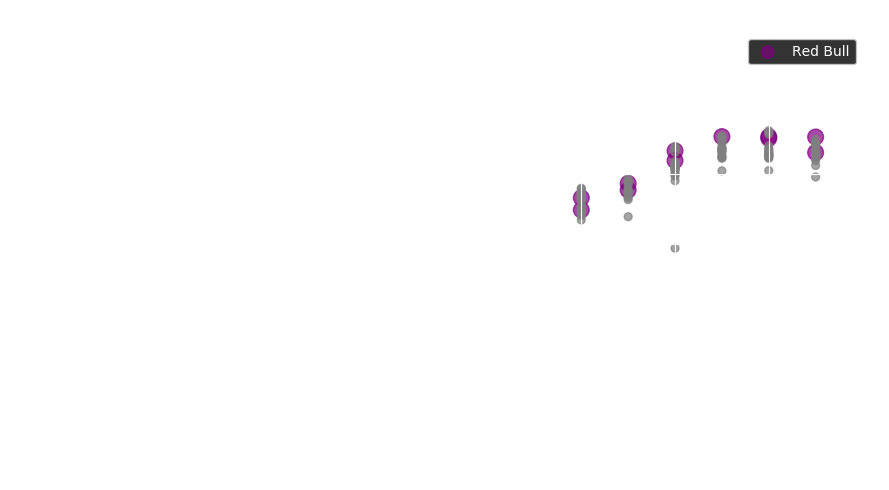

In [5]:
axes = teamdots('Red Bull Ring', 'purple', 'Red Bull')
axes.figure.savefig(folder / 'lauf_der_stiere.png')

## force canada

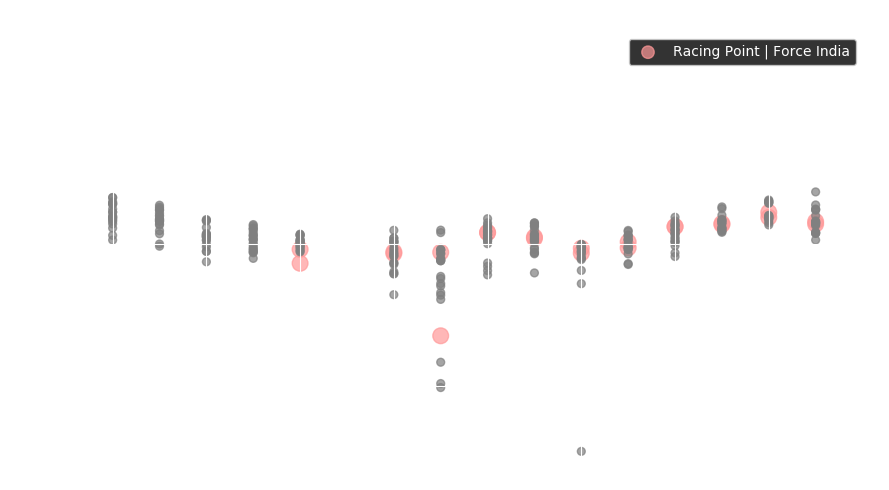

In [6]:
teams = ['Racing Point', 'Force India']
axes = teamdots('Circuit Gilles Villeneuve', '#ff9999', *teams)
axes.figure.savefig(folder / 'force_canada.png')

## open catalan

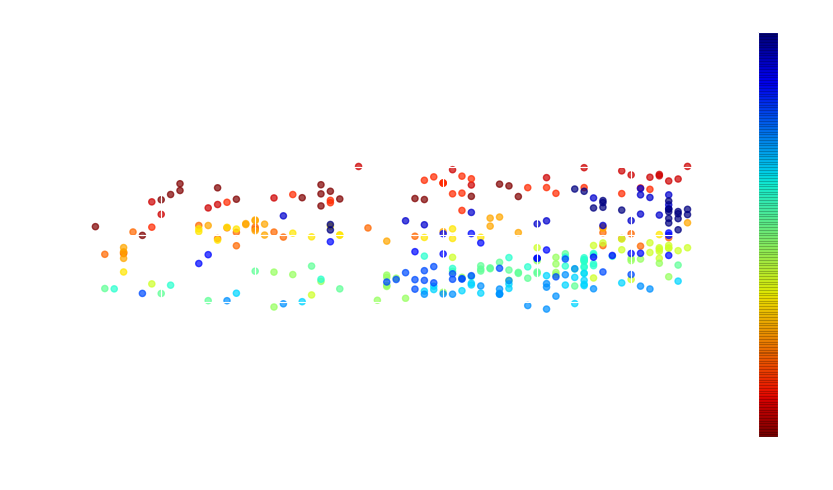

In [7]:
def lapdots(circuit, **kwargs):
    kwset = kwargs.setdefault
    kwset('colorbar', True)
    kwset('cmap', 'jet_r')
    kwset('title', f"{circuit} fastest lap for each driver")
    kwset('xlabel', 'lap number')
    kwset('ylabel', 'kph')
    kwset('ylim', (140, 260))

    data = fastlaps.loc[lambda df: df['circuit'].eq(circuit)]
    data = data['fastlap kph season'.split()]
    
    return plot.scatter(data, **kwargs)

axes = lapdots('Circuit de Barcelona-Catalunya')
axes.figure.savefig(folder / 'open_catalan.png')

## spoon benders

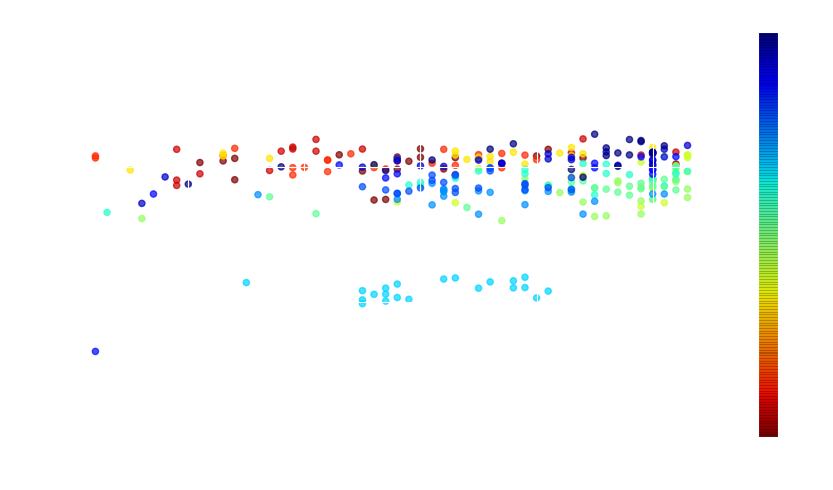

In [8]:
axes = lapdots('Suzuka Circuit')
axes.figure.savefig(folder / 'spoon_benders.png')

## casino royale

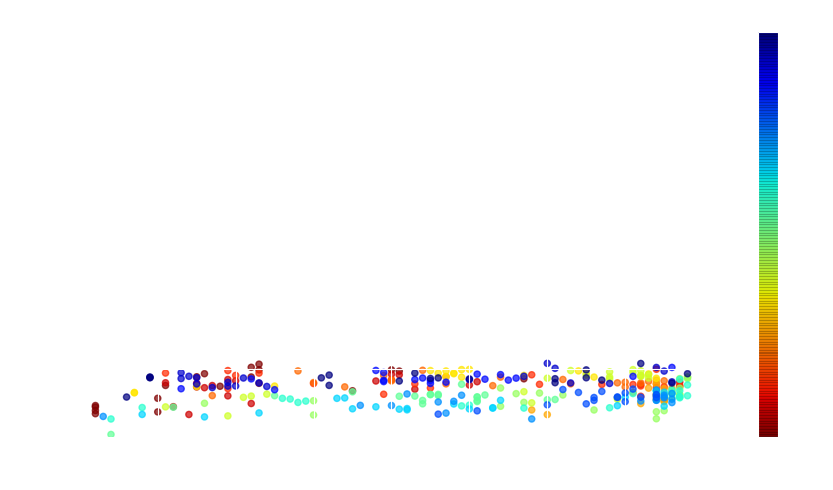

In [9]:
axes = lapdots('Circuit de Monaco')
axes.figure.savefig(folder / 'casino_royale.png')

## acelerando do lago

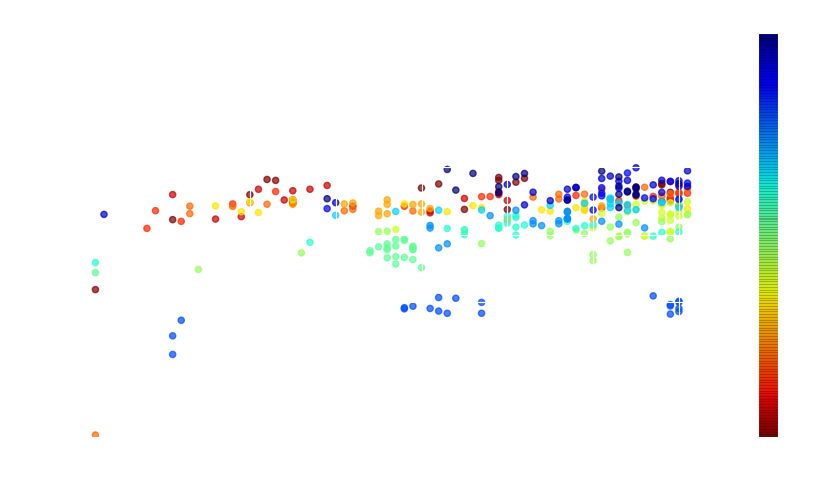

In [10]:
axes = lapdots('Autódromo José Carlos Pace')
axes.figure.savefig(folder / 'acelerando_do_lago.png')

## rapidité de l'eau rouge

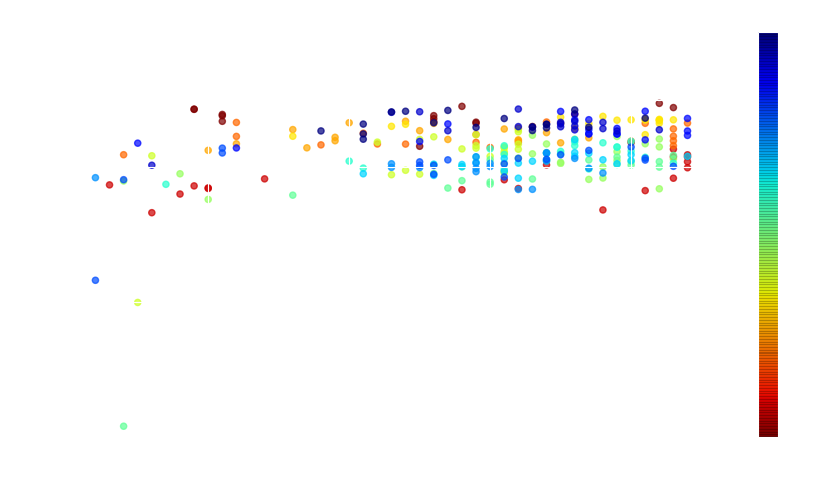

In [11]:
axes = lapdots('Circuit de Spa-Francorchamps')
axes.figure.savefig(folder / 'rapidite_de_leu_rouge.png')